# Project 2
## Name: Rohit Patil
### Course: DSC680 - Applied Data Science
### Milestone 2: EDA and Model Building
### Due Date: 26/10/2025

***

## The Relationship Between Screen Time and Mental Wellness

### Business Problem

With the rapid adoption of digital devices, screen time has become a normative part of contemporary living; however, the implications for mental health are a significant public health issue. A variety of studies have supported this connection through relationships between screen time and adverse psychological effects like depression, anxiety, and lower levels of general wellness, especially in young adults and adolescents. Organizations and health professionals must better understand these relationships to develop practical wellness guidelines and support strategies.

### Dataset for analysis
https://www.kaggle.com/datasets/adharshinikumar/screentime-vs-mentalwellness-survey-2025

### Data Attributes

This dataset captures insights from 400 survey participants on how their daily screen usage relates to mental wellness. With the growing prevalence of digital devices in our lives, understanding the link between screen time, sleep quality, stress, and productivity is a crucial research area for data science, psychology, and public health.

- Each row represents a unique participant and includes:
- Demographics (age, gender, occupation, student/working)
- Daily Screen Time (mobile, laptop, TV, total)
- Sleep Quality (self-reported rating)
- Stress Levels (scale 1–10)
- Productivity Score (self-perception)
- Mental Wellness Indicators (mood, energy, focus)

In [5]:
# Import required library/dependency
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

### Step 1: Load the data and validate the data and column information

In [7]:
# Load Data
screen_time_mental_wellness_df = pd.read_csv("ScreenTime vs MentalWellness.csv")

In [8]:
# Validate if datasets are loaded properly
screen_time_mental_wellness_df.head()

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN


In [9]:
# Proactive cleaning: Some CSVs can have completely empty columns if not saved correctly.
# This line removes them to prevent issues later in the analysis.
screen_time_mental_wellness_df.dropna(axis=1, how='all', inplace=True)

In [10]:
print(f"Dataset contains {screen_time_mental_wellness_df.shape[0]} rows and {screen_time_mental_wellness_df.shape[1]} columns.")

Dataset contains 400 rows and 15 columns.


In [11]:
# Data information for the dataset is loaded and has all column info
screen_time_mental_wellness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social_hours_per_wee

In [12]:
screen_time_mental_wellness_df_copy = screen_time_mental_wellness_df

### Step 2: Visual Analysis of data

#### 2.1. Distribution of Daily Screen Time

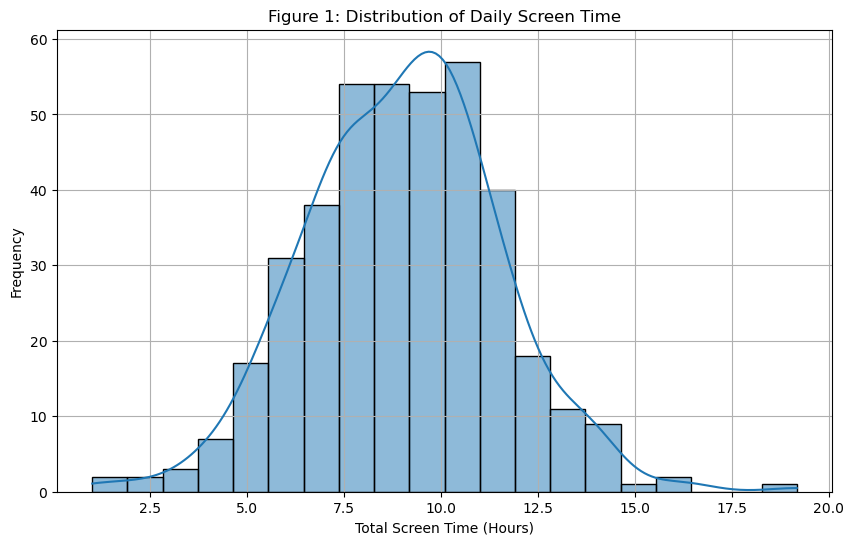

Generated figure1.png


In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(screen_time_mental_wellness_df["screen_time_hours"], kde=True, bins=20)
plt.title("Figure 1: Distribution of Daily Screen Time")
plt.xlabel("Total Screen Time (Hours)")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig("figure1.png")
plt.show()
plt.close()
print("Generated figure1.png")

#### 2.2 Sleep Quality by Occupation

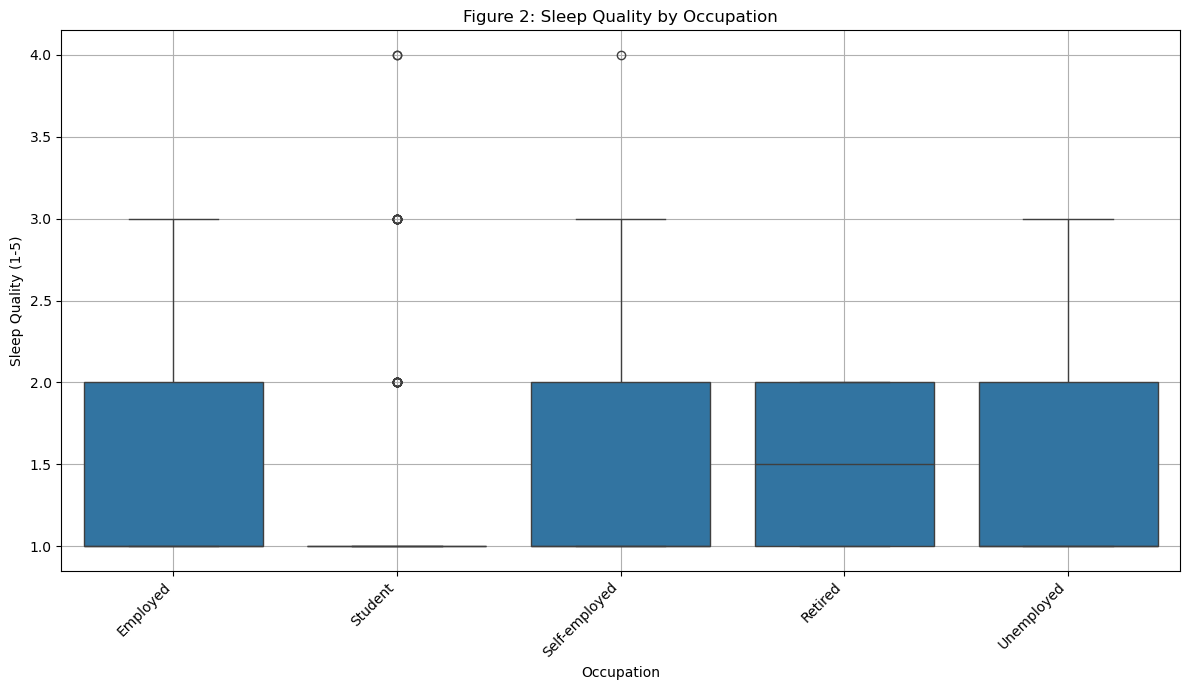

Generated figure2.png


In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="occupation", y="sleep_quality_1_5", data=screen_time_mental_wellness_df)
plt.title("Figure 2: Sleep Quality by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Sleep Quality (1-5)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True)
plt.savefig("figure2.png")
plt.show()
plt.close()
print("Generated figure2.png")

#### 2.3 Leisure Screen Hours vs. Mental Wellness Index

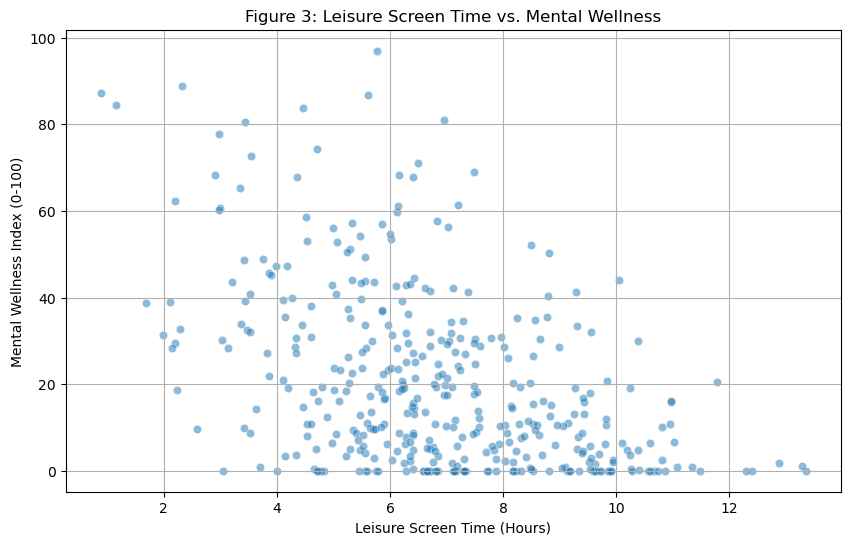

Generated figure3.png


In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="leisure_screen_hours", y="mental_wellness_index_0_100", data=screen_time_mental_wellness_df, alpha=0.5)
plt.title("Figure 3: Leisure Screen Time vs. Mental Wellness")
plt.xlabel("Leisure Screen Time (Hours)")
plt.ylabel("Mental Wellness Index (0-100)")
plt.grid(True)
plt.savefig("figure3.png")
plt.show()
plt.close()
print("Generated figure3.png")

#### 2.4 Correlation Matrix of Key Variables

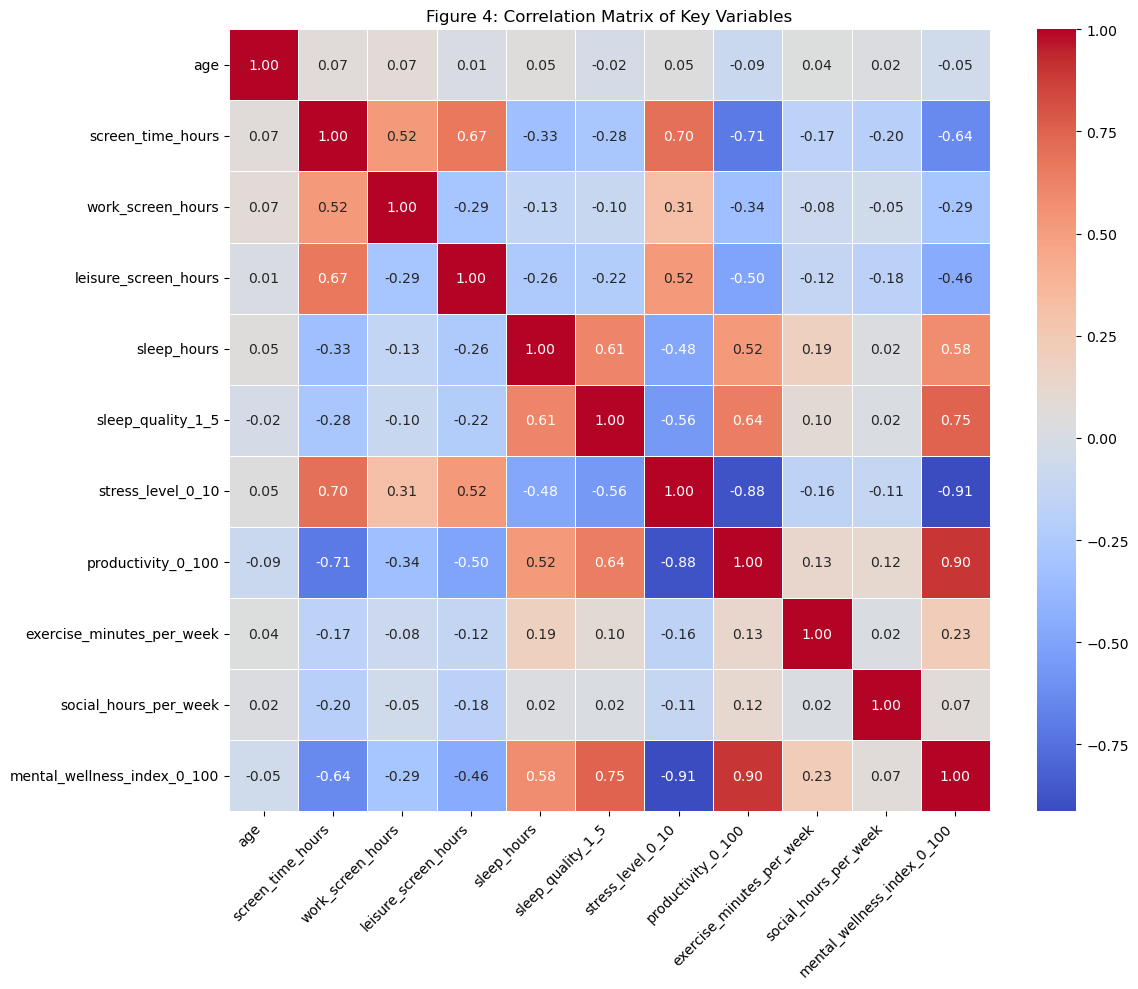

Generated figure4.png


In [21]:
numeric_cols = screen_time_mental_wellness_df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Figure 4: Correlation Matrix of Key Variables")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("figure4.png")
plt.show()
plt.close()
print("Generated figure4.png")

### Step 3: Exploratory Data Analysis (EDA)

##### Before modeling, we must understand our data. EDA provides critical insights.
##### df.info() is used to get a high-level overview of data types and missing values.
##### df.describe() provides key statistical measures for each numerical column, helping us spot anomalies or understand distributions.

In [24]:
print("Dataset Information:")
screen_time_mental_wellness_df.info()
print("\nDescriptive Statistics:")
print(screen_time_mental_wellness_df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13 

### Step 4: Data Cleaning

##### **Choice of Strategy:** Mean Imputation
##### The dataset has very few missing values. In this context, mean imputation is a straightforward and effective strategy.
##### It allows us to keep all rows in our dataset, preserving valuable information without introducing significant bias.
##### More complex methods like MICE or KNN imputation are computationally expensive and unnecessary for this particular dataset.

In [27]:
print(f"Total missing values before cleaning: {screen_time_mental_wellness_df.isnull().sum().sum()}")
for col in screen_time_mental_wellness_df.select_dtypes(include=np.number).columns:
    if screen_time_mental_wellness_df[col].isnull().any():
        screen_time_mental_wellness_df[col] = screen_time_mental_wellness_df[col].fillna(screen_time_mental_wellness_df[col].mean())
print(f"Total missing values after cleaning: {screen_time_mental_wellness_df.isnull().sum().sum()}")

Total missing values before cleaning: 0
Total missing values after cleaning: 0


In [28]:
# Remove duplicate rows based on the unique user identifier
screen_time_mental_wellness_df = screen_time_mental_wellness_df.drop_duplicates(subset=["user_id"]) 

### Step 5: Feature Engineering & Pre-processing 

#### This step is crucial for preparing the data for machine learning algorithms.
##### **Choice of Strategy:** One-Hot Encoding for Categorical Features
##### Machine learning models require all input features to be numeric. Columns like 'gender' and 'occupation' are nominal categories
##### (i.e., they have no inherent order). Using simple Label Encoding (e.g., Student=0, Manager=1) would incorrectly imply that Manager is "greater than" Student.
##### One-Hot Encoding avoids this by creating new binary (0/1) columns for each category, treating them as distinct and equal groups.

In [31]:
categorical_features = ["gender", "occupation", "work_mode"]
print(f"Applying one-hot encoding to: {categorical_features}")
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(screen_time_mental_wellness_df[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

screen_time_mental_wellness_df = screen_time_mental_wellness_df.drop(columns=categorical_features)
screen_time_mental_wellness_df = pd.concat([screen_time_mental_wellness_df, encoded_df], axis=1)
print("Categorical features encoded.")

Applying one-hot encoding to: ['gender', 'occupation', 'work_mode']
Categorical features encoded.


##### **Choice of Strategy:** Hypothesis-Driven Feature Creation
##### We hypothesize that the *balance* between leisure and work screen time might be more predictive of mental wellness than the raw hours alone.
##### This new 'screen_time_ratio' feature is designed to capture this relationship. If the model finds this feature important, it validates our hypothesis.
##### This is a common technique to provide more nuanced signals to the model.
##### A small epsilon (1e-6) is added to the denominator to prevent division-by-zero errors.

In [33]:
screen_time_mental_wellness_df["screen_time_ratio"] = screen_time_mental_wellness_df["leisure_screen_hours"] / (screen_time_mental_wellness_df["work_screen_hours"] + 1e-6)
print("Created new feature: 'screen_time_ratio'")

Created new feature: 'screen_time_ratio'


In [34]:
screen_time_mental_wellness_df.head()

,user_id,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,...,gender_Non-binary/Other,occupation_Employed,occupation_Retired,occupation_Self-employed,occupation_Student,occupation_Unemployed,work_mode_Hybrid,work_mode_In-person,work_mode_Remote,screen_time_ratio
0,U0001,33,10.79,5.44,5.35,6.63,1,9.3,44.7,127,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.983456
1,U0002,28,7.40,0.37,7.03,8.05,3,5.7,78.0,74,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.999949
2,U0003,35,9.78,1.09,8.69,6.48,1,9.1,51.8,67,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.972470
3,U0004,42,11.13,0.56,10.57,6.89,1,10.0,37.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.874966
4,U0005,28,13.22,4.09,9.13,5.79,1,10.0,38.5,143,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.232273


### Step 6: Model Training and Evaluation

##### **Choice of Strategy:** Testing a Spectrum of Models
##### No single machine learning model is universally best. By testing a wide variety, we can determine which type of model best captures the underlying patterns in this specific dataset.
##### - Linear Models (Linear, Lasso, Ridge): Provide a strong, interpretable baseline. They are good at finding linear relationships.
##### - SVR (Support Vector Regressor): A versatile model that can capture non-linear relationships.
##### - Ensemble Models (Random Forest, Gradient Boosting, XGBoost): These are powerful and flexible models that combine many individual models (usually decision trees) to produce a more accurate and robust prediction, capable of capturing very complex, non-linear patterns.
##### This comprehensive approach ensures we are not limiting our analysis to one type of relationship and helps find the best possible tool for the job.

In [37]:
features = screen_time_mental_wellness_df.drop(columns=["user_id", "mental_wellness_index_0_100"])
X = features
y = screen_time_mental_wellness_df["mental_wellness_index_0_100"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1, max_iter=2000),
    "Ridge": Ridge(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "SVR": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

results = []

##### Choice of Strategy: Using Multiple Evaluation Metrics
##### Relying on a single metric can be misleading. We use three key metrics for a holistic view of model performance:
##### - R-squared: Measures the proportion of the variance in the target variable that is explained by the model. It tells us how well the model fits the data (higher is better).
##### - MAE (Mean Absolute Error): Represents the average absolute difference between the predicted and actual values. It's easy to interpret as it's in the same units as the target (e.g., an MAE of 5 means the model is off by 5 wellness points on average).
##### - RMSE (Root Mean Squared Error): Similar to MAE, but it penalizes larger errors more severely. A model with a low RMSE is one that does not make many large mistakes.

In [40]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        "Model": name,
        "R-squared": r2,
        "MAE": mae,
        "RMSE": rmse
    })

Training Linear Regression...
Training Lasso...
Training Ridge...
Training ElasticNet...
Training SVR...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training AdaBoost...
Training XGBoost...


### Step 7: Results & Summary

In [42]:
# This final section consolidates the results, identifies the best model, and visualizes the comparison.

In [43]:
results_df = pd.DataFrame(results).sort_values(by="R-squared", ascending=False)
results_df.set_index("Model", inplace=True)

print("Model Performance Comparison:")
print(results_df)

best_model_name = results_df.index[0]
best_model_r2 = results_df.iloc[0]["R-squared"]
print(f"\nBest performing model: {best_model_name} with an R-squared of {best_model_r2:.4f}")

Model Performance Comparison:
                   R-squared        MAE       RMSE
Model                                             
Ridge               0.933573   3.980978   5.125758
Linear Regression   0.933303   3.999577   5.136162
Lasso               0.929090   4.069884   5.295908
ElasticNet          0.928549   4.086875   5.316045
Gradient Boosting   0.901874   5.048629   6.229857
Random Forest       0.889622   5.236713   6.607356
XGBoost             0.881160   5.191321   6.855939
AdaBoost            0.868681   5.822936   7.206910
Decision Tree       0.807144   6.613750   8.733778
SVR                 0.223063  12.815294  17.529857

Best performing model: Ridge with an R-squared of 0.9336


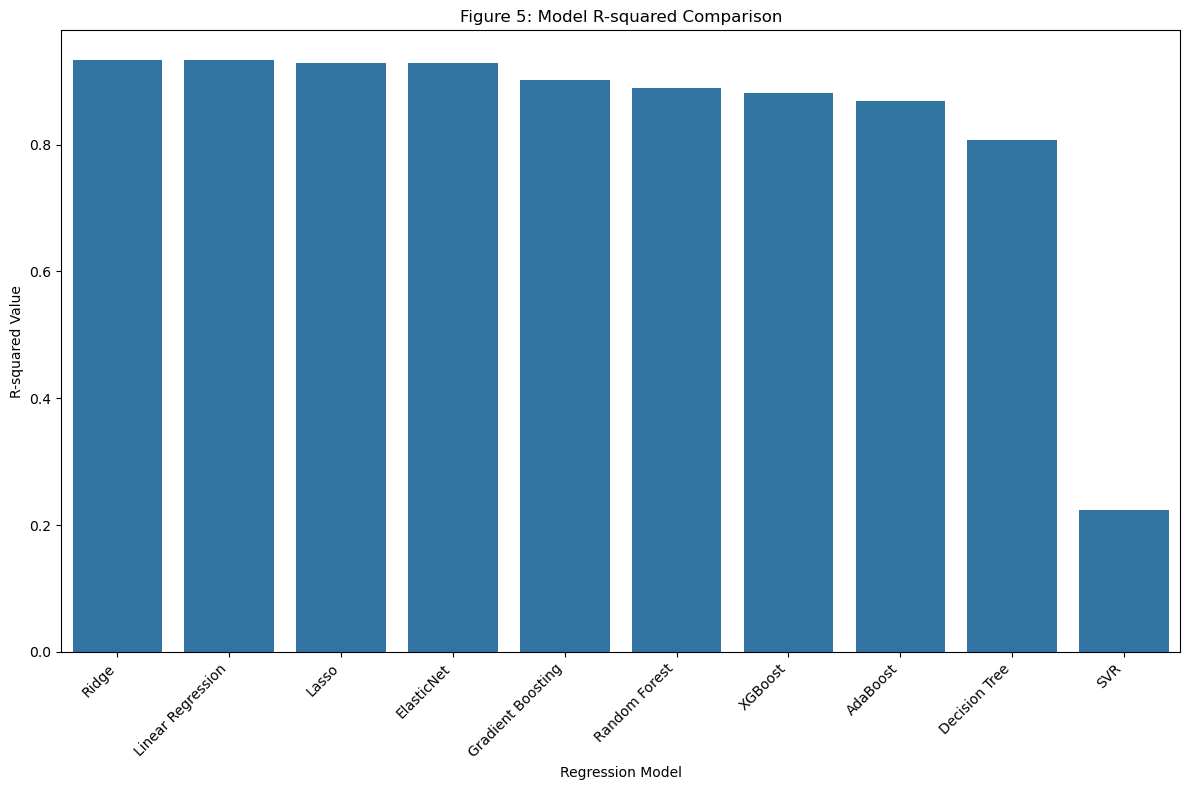

Generated figure5.png with model performance comparison.


In [44]:
# A final visualization is created to provide an immediate, clear comparison of all tested models.
plt.figure(figsize=(12, 8))
sns.barplot(x=results_df.index, y=results_df["R-squared"])
plt.title("Figure 5: Model R-squared Comparison")
plt.xlabel("Regression Model")
plt.ylabel("R-squared Value")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("figure5.png")
plt.show()
plt.close()
print("Generated figure5.png with model performance comparison.")